# Exploratory Data Analysis

### Banking Marketing Campaign

In [2]:
#Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

# To supress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

***STEP 1: PROBLEM STATEMENT & DATA COLLECTION***

The bank uses phone calls to reach out to customers and conduct marketing campaigns targeting long-term deposits. The goal is to optimize these contacts by targeting customers who are most likely to stick with the product.

**Project Goal:**
Create a classification model to predict whether or not a customer will take out a long-term deposit based on data provided by the bank.

**1.1 PROBLEM STATEMENT**

**Customer Profile:**

* Which age groups are most likely to take up a long-term deposit?
* Is there a correlation between the type of work (job) or level of education (education) and the decision to hire the deposit?
* Are customers with personal loans or mortgages less likely to stick to long-term deposits?

**Demographic and Marital Status Analysis:**

* Is there a difference in the adherence rate between married, single and other marital statuses?
* Do customers of certain age groups or marital status tend to adhere more to long-term products?

**Contact History and Adhesion Probability:**

* Which contact method has the highest success rate?
* Does the duration of contact influence the probability of conversion? Is there an optimal duration to maximize adherence?
* Is there a relationship between the number of contacts made in previous campaigns (campaign, previous) and the probability of adherence?

**Temporal Analysis:**

*  Does the month (month) or day of the week (day_of_week) of the contact affect the probability of adherence?
* Do success rates vary throughout the year or across days of the week?

**Economic Indicators and Customer Behavior:**

* How do macroeconomic variables such as the 3-month EURIBOR rate (euribor3m) or employment rate (emp.var.rate) influence customers' decision?
* Is there a relationship between the consumer confidence index (cons.conf.idx) and the willingness of customers to join the deposit?

**Previous Campaign Analysis:**

* How does the result of previous campaigns (poutcome) influence customers’ decisions?
* Are customers who were contacted in previous campaigns more likely to participate in this campaign?

**Customer Profile and Product Adherence:**

* Is there a common profile among customers who subscribe to long-term deposits? How do age, marital status, type of work and education level correlate with adherence?
* Is there a pattern in clients showing a greater propensity to accept long-term investment products?

**1.2. DATA COLLECTION**

In [3]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.to_csv("../data/raw/bank_data.csv", index=False)

***STEP 2: EXPLORATION & DATA CLEANING***

***2.1. EXPLORATION***

#### 2.1.1. Understanding the features

* age. Age of customer (numeric)
* job. Type of job (categorical)
* marital. Marital status (categorical)
* education. Level of education (categorical)
* default. Do you currently have credit (categorical)
* housing. Do you have a housing loan (categorical)
* loan. Do you have a personal loan? (categorical)
* contact. Type of contact communication (categorical)
* month. Last month in which you have been contacted (categorical)
* day_of_week. Last day on which you have been contacted (categorical)
duration. Duration of previous contact in seconds (numeric)
* campaign. Number of contacts made during this campaign to the customer (numeric)
* pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
* previous. Number of contacts made during the previous campaign to the customer (numeric)
* poutcome. Result of the previous marketing campaign (categorical)
* emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
* cons.price.idx. Consumer price index. Monthly indicator (numeric)
* cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
* euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
* nr.employed. Number of employees. Quarterly indicator (numeric)
* y. TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [5]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(41188, 21)


In [6]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [7]:
# Obtaining Dataset statistics description:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


##### Statements

* This DataFame is composed by 41 188 rows and 21 columns (variables). 
* There are no variables with null values. 
* The data has:
    * **10 numerical variables** - 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed';
    * **6 categorical variables** - 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' and 'y'.

In [8]:
# Transforming the unknown and nonexistent values ​​into NaN so that we can process and fill them.
df.replace(['unknown', 'nonexistent'], np.nan, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes


#### 2.1.2. Identifying Null Values in each feature

In [9]:
# Obtaining Dataset informations about null values
print("Missing values ​​by column:")
print(df.isna().sum()[df.isna().sum()>0])

Missing values ​​by column:
job            330
marital         80
education     1731
default       8597
housing        990
loan           990
poutcome     35563
dtype: int64


In [10]:
# another option to obtain the total number of null values in each column:
# df.isnull().sum()

***2.2. ELIMINATE DUPLICATES***

In [11]:
# Verificar o número de duplicatas no DataFrame
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Se houver duplicatas, eliminá-las
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 12
Duplicate rows have been removed.


***2.3. ELIMINATE IRRELEVANT INFORMATION***

* all variables will be kept.

In the early stages of developing a classification model to predict whether or not a customer will take out a long-term deposit, I chose to keep all variables because I do not yet know the impact of each variable on the model.

### Dealing with null values (extra step needed)

In [12]:
#Sacamos el porcentaje de valores NaN
df.isnull().sum().sort_values(ascending=False)

poutcome          35551
default            8596
education          1730
housing             990
loan                990
job                 330
marital              80
age                   0
contact               0
day_of_week           0
duration              0
campaign              0
month                 0
pdays                 0
previous              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [13]:
df=df.copy()

In [14]:
#Rellenamos los valores NaN
# Preenchendo valores ausentes com o modo (valor mais frequente) de cada coluna
df["poutcome"] = df["poutcome"].fillna(df["poutcome"].mode()[0])
df["default"] = df["default"].fillna(df["default"].mode()[0])
df["education"] = df["education"].fillna(df["education"].mode()[0])
df["housing"] = df["housing"].fillna(df["housing"].mode()[0])
df["loan"] = df["loan"].fillna(df["loan"].mode()[0])
df["job"] = df["job"].fillna(df["job"].mode()[0])
df["marital"] = df["marital"].fillna(df["marital"].mode()[0])

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

***STEP 3: ANALYSIS OF UNIVARIATE VARIABLES***

Dividing the dataset into categorical and numerical

In [15]:
# Identificar variáveis numéricas
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
num_numerical_vars = len(numerical_vars)  # Contar o número de variáveis numéricas

# Identificar variáveis categóricas
categorical_vars = df.select_dtypes(include=['object']).columns
num_categorical_vars = len(categorical_vars)  # Contar o número de variáveis categóricas

# Exibir os resultados
print(f"Numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))
print('\n')
print(f"Categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))

Numerical variables: 10
Numerical variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Categorical variables: 11
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [16]:
#Analizamos los tipos de información que tenemos

df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [17]:
#Dividimos el datafram original por valores numéricos y categóricos

num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

**3.1. ANALYSIS OF CATEGORICAL VARIABLES**

In [18]:
df_cat.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,failure,no
1,services,married,high.school,no,no,no,telephone,may,mon,failure,no
2,services,married,high.school,no,yes,no,telephone,may,mon,failure,no


In [19]:
def plot_categorical_variables(df, categorical_columns=None, hue=None):
    """
    Plota gráficos de contagem para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame a ser analisado.
    - categorical_columns: Lista de colunas categóricas. Se None, seleciona automaticamente colunas do tipo 'object'.
    - hue: Variável de cor para as colunas (opcional), como a variável target, se relevante.
    """
    # Detecta colunas categóricas automaticamente, se não fornecidas
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Configura o layout dos subplots para ter 3 colunas
    num_cols = 3
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # calcula o número de linhas necessário
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))

    # Flattea a matriz de eixos para facilitar a iteração
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(ax=axes[i], data=df, x=col, hue=hue)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=90)

    # Remove eixos extras se houver menos colunas do que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


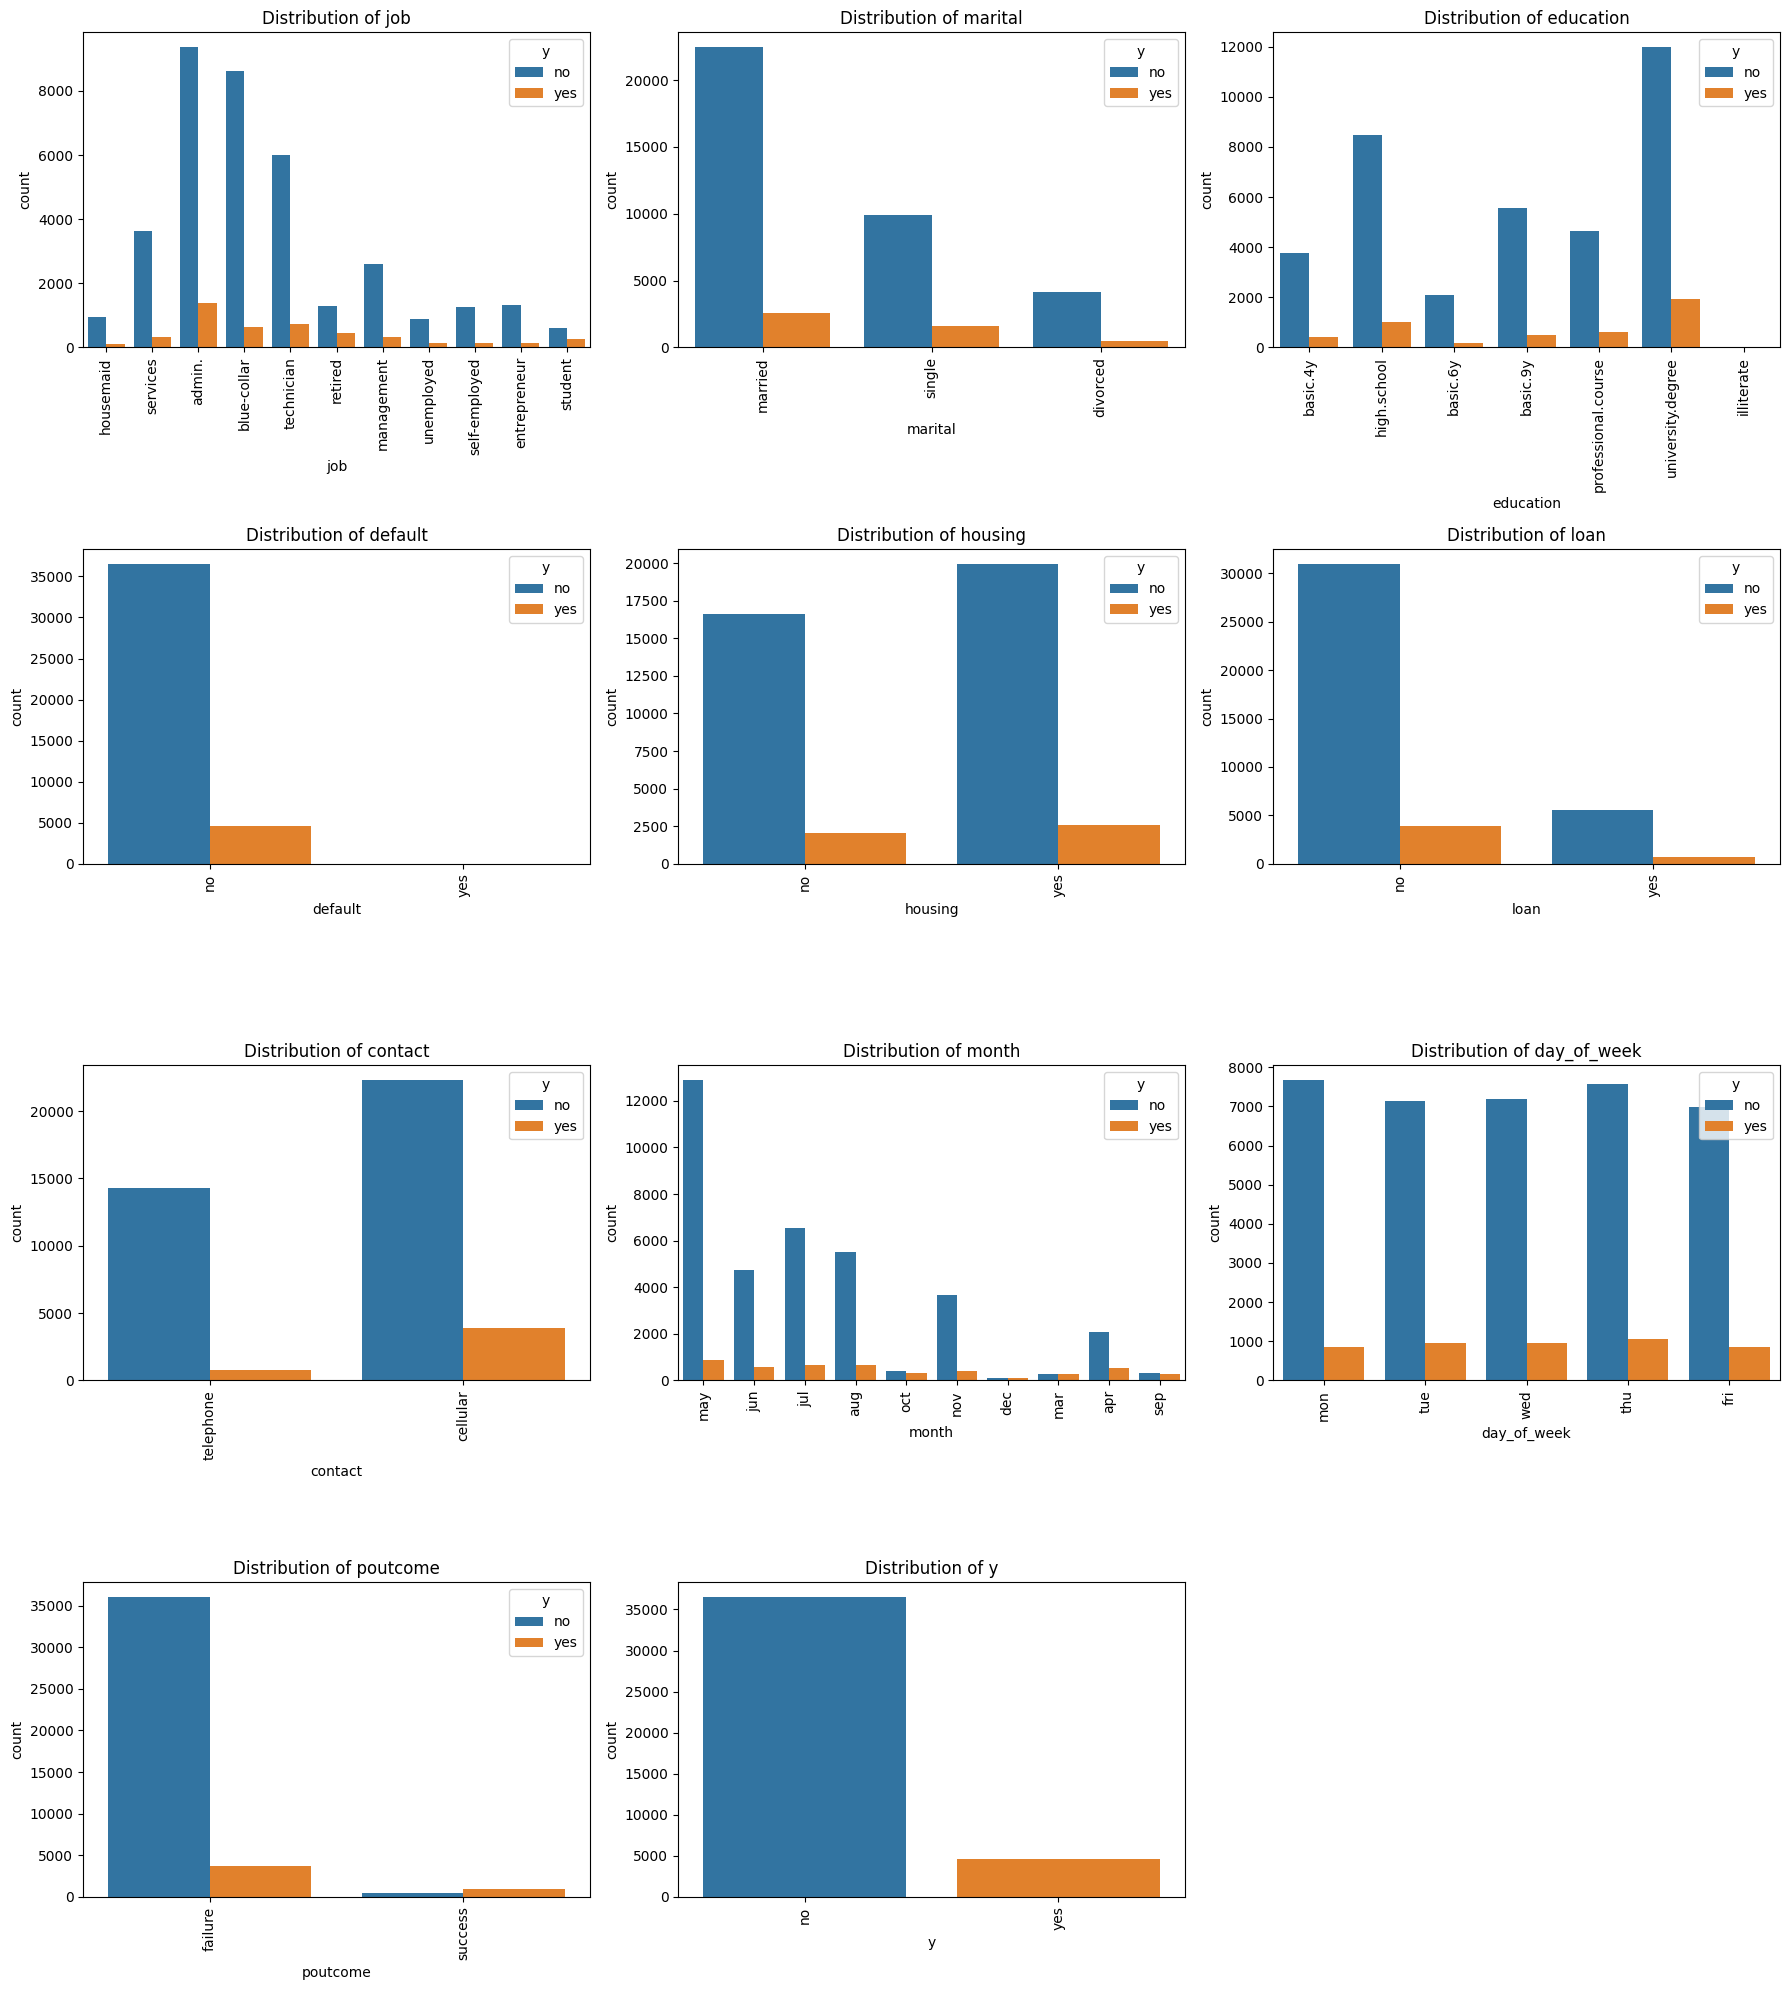

In [20]:
# Obtaining categorical variables graphs
plot_categorical_variables(df=df, hue='y')

#### Statements 
With the representation of each variable by plotting their histogram, it's possible to determine that:

* ****job**** - The adoption rate (indicated by the proportion of "yes" in relation to the total) varies between professions. Most clients are in professions such as "admin.", "blue-collar" and "technician". However, it is possible to observe that some categories with fewer clients, such as "student" and "housemaid", have a slightly higher adoption rate, indicating potential interest of these groups in long-term deposits;

* ****marital**** - The majority of clients are married, followed by singles. However, singles and divorced individuals show a slightly higher adoption rate compared to married clients;

* ****education**** -  Most clients have secondary or tertiary education, with similar adoption rates across education levels. There isn’t a clear difference in adoption based on education;

* ****default**** - Most clients do not have active credit (default). Clients in default show a much lower adoption rate, indicating that credit status negatively influences adoption;

* ****housing**** - Most clients have a housing loan, but those without one show a slightly higher adoption rate. Clients without a mortgage may be more open to adopting the product;

* ****loan**** - Similar to housing loans, most clients do not have personal loans, and the adoption rate is lower among those who do have loans. This suggests a possible reluctance to adopt due to existing financial commitments;

**note:** Customers without active credit, without a mortgage loan, and without a personal loan show a slightly higher propensity to adopt the long-term banking product. This profile may indicate that customers with fewer financial commitments (less debt) are more inclined to accept the new product, which can be useful information for segmenting marketing campaigns;

* ****contact**** - Most contacts are made via mobile phone, which also has a higher adoption rate compared to landlines. Mobile contacts appear to be more effective;

* ****month**** - May has the highest volume of contacts, but months like March and December, with fewer contacts, show a slightly higher adoption rate, suggesting that seasonality may influence the adoption decision;

* ****day_of_week**** - There is no significant variation in the adoption rate across the days of the week, indicating that the contact day has little impact on adoption;

* ****poutcome**** - Clients who had a successful outcome in previous campaigns have a significantly higher adoption rate in this campaign, suggesting that past campaign success can be a good indicator for future campaign targeting;

* ****y (target)**** - Most clients did not opt for the long-term deposit, reflecting a low overall adoption rate. This suggests limited appeal of the product among clients or potential improvement areas in segmentation strategies.





Based on the above, I considered to discard:

* `month`
* `day_of_week`


These variables are unlikely to have a strong influence on whether a customer subscribes to a long-term deposit, as they are more indicative of scheduling than customer characteristics.

**3.2. ANALYSIS OF NUMERICAL VARIABLES**

In [21]:
df_num.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [34]:
def plot_numerical_variables(df, numerical_columns=None):
    """
    Plota histogramas e boxplots para variáveis numéricas em um layout de 2 colunas,
    usando uma paleta de cores fixa para consistência visual.
    
    Parâmetros:
    - df: DataFrame a ser analisado.
    - numerical_columns: Lista de colunas numéricas. Se None, seleciona automaticamente colunas do tipo 'float' e 'int'.
    """
    # Detecta colunas numéricas automaticamente, se não fornecidas
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()

    # Calcula o número de linhas necessário
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Dividido por 2 colunas, arredondando para cima

    # Configura o layout dos subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 4))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    # Achata o array de eixos para facilitar a iteração
    axes = axes.flatten()

    # Define uma paleta de cores fixa
    palette = sns.color_palette("colorblind", num_vars)

    # Loop para criar histogramas e boxplots para cada variável numérica
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Garante que o índice da cor fique dentro do comprimento da paleta
        sns.histplot(ax=axes[i * 2], data=df, x=col, color=color).set(xlabel=None, title=col.capitalize())
        sns.boxplot(ax=axes[i * 2 + 1], data=df, x=col, color=color).set(xlabel=None, title=col.capitalize())
        axes[i * 2 + 1].set(xlabel=None)  # Remove o rótulo x do boxplot para consistência

    # Remove eixos extras se houver um número ímpar de variáveis
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



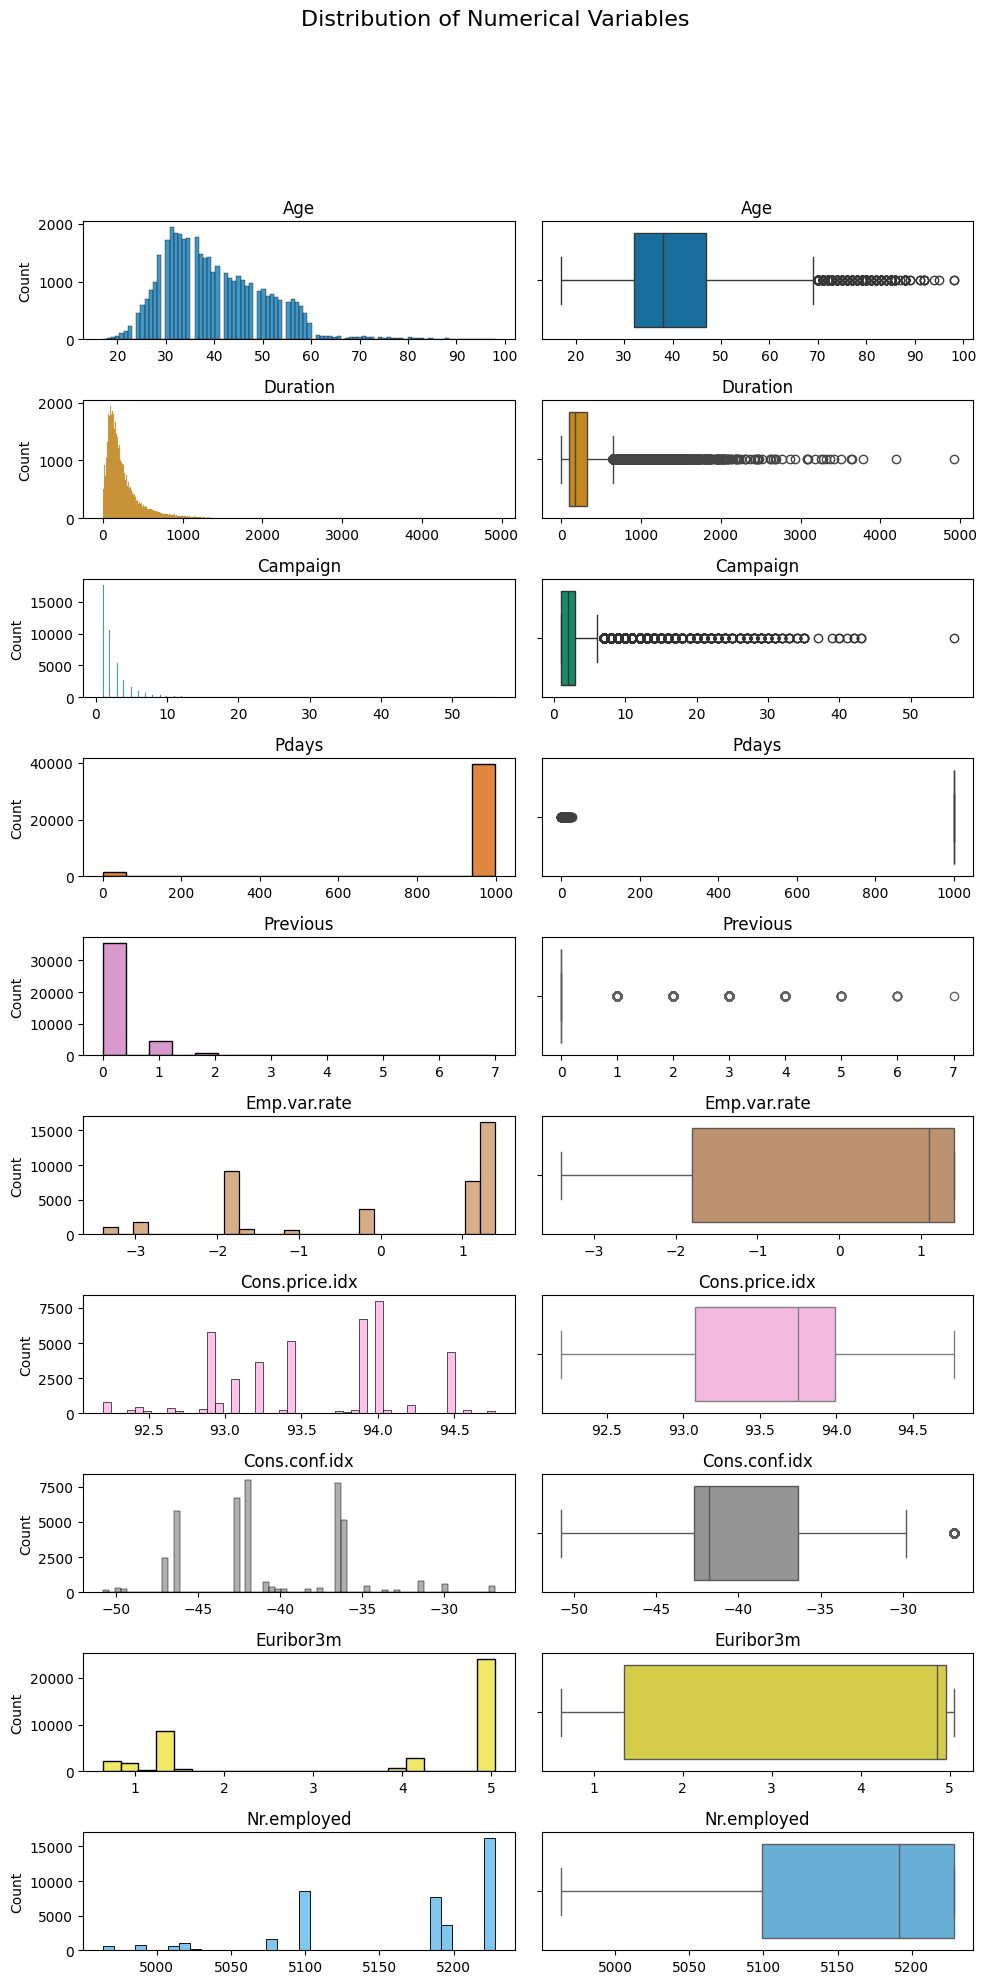

In [35]:

plot_numerical_variables(df=df)


#### Statements

 
* **age(Age of customer):**  Most clients are in the 20-60 age range, with a slightly asymmetric distribution, indicating a higher concentration of working-age clients (in the 30-50 age range). There are some outliers, especially those over 70 years old; these should be kept, as they represent a small group;

* **duration (Duration of previous contact in seconds):** Most call durations are short, with a concentration around low values. There are significant outliers at higher durations, indicating that some contacts were very long. Longer contacts may indicate a higher probability of campaign success, and are therefore a relevant variable;

* **campaign (Number of contacts made during this campaign to the customer):** Most clients were contacted only a few times during the current campaign, with most having one or two attempts. There are outliers indicating some clients who were contacted more than 10 times, which is less common;

* **pdays (Number of days that elapsed since the last campaign until the customer was contacted):** The distribution shows that most clients have a value of 999 for this variable, meaning they were not contacted in previous campaigns. This value acts as a specific "marker" for new contacts, so it should be treated as a separate category or replaced with NaN to indicate no previous contact;

* **previous (Number of contacts made during the previous campaign to the customer):**  Most customers have not been contacted before (value 0), while some had multiple contacts in past campaigns; which may affect the success rate;

* **Emp.var.rate:** The employment variation rate is distributed over a few distinct values. There aren’t many outliers, with most observations concentrated at higher values (above 0);

* **Cons.price.idx:** The consumer price index distribution is concentrated around a few specific values, reflecting little variation over time. There are no significant outliers;

* **Cons.conf.idx:** The consumer confidence index spans a wide range, but most values are concentrated between -50 and -30. There are a few minor outliers;

* **Euribor3m:** The 3-month Euribor rate is concentrated around a few specific values, with most clients having a rate of around 5%. This reflects economic conditions of a specific period;

* **nr.employed (Number of employees):** The number of employees is also concentrated around a few specific values, with few outliers. Most data points are within a small range, indicating employment stability over time.


**Outliers:** Variables like `duration`, `campaign`, `pdays`, and `previous` show significant outliers, suggesting a need for specific treatment if these extreme values negatively impact modeling.

**Economic Stability:** Variables such as `emp.var.rate`, `cons.price.idx`, `euribor3m`, and `nr.employed` reflect economic stability over certain periods, showing limited variation.

I decided to keep variables that directly relate to customer behavior, previous engagement, and broader economic sentiment, as these are more likely to influence an individual’s decision on long-term deposits.

**Retain:** `age`, `ampaign`, `pdays`, `previous`, `emp.var.rate`, `cons.conf.idx`, `euribor3m`.

**Remove:** `duration`, `cons.price.idx`, `nr.employed`.

#### Discarding variables

After analyzing the behavior of the variables, I consider eliminating some:

In [24]:
# List of columns to remove (numerical and categorical)
columns_to_remove = ['month', 'day_of_week', 'duration', 'cons.price.idx', 'nr.employed']

# Drop the columns from the DataFrame
df_refined = df.drop(columns=columns_to_remove)

# Display the updated DataFrame structure to verify the changes
print("Updated DataFrame structure with removed columns:")
print(df_refined.info())



Updated DataFrame structure with removed columns:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41176 non-null  int64  
 1   job            41176 non-null  object 
 2   marital        41176 non-null  object 
 3   education      41176 non-null  object 
 4   default        41176 non-null  object 
 5   housing        41176 non-null  object 
 6   loan           41176 non-null  object 
 7   contact        41176 non-null  object 
 8   campaign       41176 non-null  int64  
 9   pdays          41176 non-null  int64  
 10  previous       41176 non-null  int64  
 11  poutcome       41176 non-null  object 
 12  emp.var.rate   41176 non-null  float64
 13  cons.conf.idx  41176 non-null  float64
 14  euribor3m      41176 non-null  float64
 15  y              41176 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 

In [25]:
# Current dataset
df_refined.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,0,failure,1.1,-36.4,4.857,no
1,57,services,married,high.school,no,no,no,telephone,1,999,0,failure,1.1,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,0,failure,1.1,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,0,failure,1.1,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,0,failure,1.1,-36.4,4.857,no


***STEP 4: ANALYSIS OF MULTIVARIATE VARIABLES***

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

**4.1 NUMERICAL-NUMERICAL ANALYSIS**



In this bank marketing dataset, our variable of interest for bivariate analysis is y, which indicates whether a customer subscribed to the long-term deposit product. As a binary outcome variable, y represents the success of the bank’s marketing efforts. Analyzing how y varies in relation to other continuous numerical variables can help us identify potential factors that influence a customer's likelihood to subscribe. This analysis allows us to uncover patterns and correlations that could inform more targeted and effective marketing strategies.